<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Phase3-Project" data-toc-modified-id="Phase3-Project-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Phase3 Project</a></span><ul class="toc-item"><li><span><a href="#Business-Objective" data-toc-modified-id="Business-Objective-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Business Objective</a></span></li></ul></li><li><span><a href="#Dataset" data-toc-modified-id="Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Checking-for-Null-values" data-toc-modified-id="Checking-for-Null-values-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Checking for Null values</a></span></li><li><span><a href="#Examining-the-traget-feature" data-toc-modified-id="Examining-the-traget-feature-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Examining the traget feature</a></span></li><li><span><a href="#Checking-for-numeric-and-categorical-data" data-toc-modified-id="Checking-for-numeric-and-categorical-data-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Checking for numeric and categorical data</a></span><ul class="toc-item"><li><span><a href="#Exploring-numeric-data" data-toc-modified-id="Exploring-numeric-data-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Exploring numeric data</a></span></li><li><span><a href="#Exploring-the-categorical-data" data-toc-modified-id="Exploring-the-categorical-data-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Exploring the categorical data</a></span></li></ul></li><li><span><a href="#Checking-for-duplicate-data" data-toc-modified-id="Checking-for-duplicate-data-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Checking for duplicate data</a></span></li></ul></li><li><span><a href="#Mapping-data" data-toc-modified-id="Mapping-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Mapping data</a></span></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Splitting-the-data-into-train-and-test-sets" data-toc-modified-id="Splitting-the-data-into-train-and-test-sets-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Splitting the data into train and test sets</a></span></li></ul></li></ul></div>

# Phase3 Project

## Business Objective

**To help the Goverment of Tanzania monitor the condition of installed waterpumps across the country.Given a set of parameters, the model should be able to predict the status of a waterpump. Status can be as classified as:** 
1. Functional
2. Needs repair
3. Does not work 
    


# Dataset

Dataset sourced from: https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/

# EDA

In [1]:
# importing dataset
import pandas as pd

df = pd.read_csv('waterwell.csv')
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

## Checking for Null values

In [3]:
# checking for null values and returning it as a pandas series
empty=df.isna().sum()
empty

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [4]:
#converting the empty series into a dictionary
empty_dict = dict(empty)

#looping thru dictionary to isolate the columns that have null values
empty_list =[]
for key,value in empty_dict.items():
    if value != 0:
        empty_list.append(key)
        
empty_list
# we now have the list of columns that have null values

['funder',
 'installer',
 'subvillage',
 'public_meeting',
 'scheme_management',
 'scheme_name',
 'permit']

In [5]:
# examining those columns
df_empty = df[empty_list]
df_empty

,funder,installer,subvillage,public_meeting,scheme_management,scheme_name,permit
0,Roman,Roman,Mnyusi B,True,VWC,Roman,False
1,Grumeti,GRUMETI,Nyamara,NaN,Other,NaN,True
2,Lottery Club,World vision,Majengo,True,VWC,Nyumba ya mungu pipe scheme,True
3,Unicef,UNICEF,Mahakamani,True,VWC,NaN,True
4,Action In A,Artisan,Kyanyamisa,True,NaN,NaN,True
...,...,...,...,...,...,...,...
59395,Germany Republi,CES,Kiduruni,True,Water Board,Losaa Kia water supply,True
59396,Cefa-njombe,Cefa,Igumbilo,True,VWC,Ikondo electrical water sch,True
59397,NaN,NaN,Madungulu,True,VWC,NaN,False
59398,Malec,Musa,Mwinyi,True,VWC,NaN,True


In [6]:
df_empty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   funder             55765 non-null  object
 1   installer          55745 non-null  object
 2   subvillage         59029 non-null  object
 3   public_meeting     56066 non-null  object
 4   scheme_management  55523 non-null  object
 5   scheme_name        31234 non-null  object
 6   permit             56344 non-null  object
dtypes: object(7)
memory usage: 3.2+ MB


We can see that all the columns that have null values are categorical.
Also,recall from the original df that total number of rows is 59400

In [7]:
# looking at scheme_name first since it has the highest number of null values
df['scheme_name'].value_counts()

K                             682
None                          644
Borehole                      546
Chalinze wate                 405
M                             400
                             ... 
Kamwanga/Erikaswa water pr      1
Kitomanga                       1
Marua mshatie water supply      1
Uwekule                         1
BL Motomati                     1
Name: scheme_name, Length: 2696, dtype: int64

Since 'scheme_name' has approx. 47% of the data missing, even classifying this as 'missing' 
might skew the analysis. Hence it's best to remove it from the analysis. 

In [8]:
#creating a copy of df for the analysis
df1 =df.copy()
df1.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [9]:
# removing 'scheme_name' from the df
df1.drop('scheme_name',axis=1,inplace=True)

Since, the rest of the columns have approx. only 6% of the data missing, we can either choose to drop it
or classify it as 'MISSING' for the analysis. Let's classify it as 'MISSING'

In [10]:
#replacing the null values as 'MISSING'
df1.fillna('MISSING',inplace=True)

In [11]:
# checking the df
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 59400 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              59400 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59400 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

We can see that there no more missing values

## Examining the traget feature

In [12]:
#examining the target variable
df1['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

'functional needs repair' is far less represented as opposed to the other 2 classes.
This imbalance might be an avenue for optimization.

## Checking for numeric and categorical data

In [13]:
# examining the data types of the df
df1.dtypes.value_counts()

object     30
int64       7
float64     3
dtype: int64

We can see that most of the features are categorical

### Exploring numeric data

In [14]:
# looking at the distributions of the numerical data
#creating a subset of the numeric data
df1_numeric = pd.DataFrame(df1.select_dtypes(include=['int64','float64']))
df1_numeric.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,0


Looking at the numeric data features, we can see that apart from 'population', normal techniques like normalization or transformations cannot be applied in the true sense to the rest of the features.

### Exploring the categorical data

Since we have a large amount of categorical data, applying one-hot encoding to all of them does might result in a lot of redundant/useless data that will affect model performance. Let's explore some of the features and see if we can trim remove some of them.

In [15]:
df1[['payment','payment_type']]

,payment,payment_type
0,pay annually,annually
1,never pay,never pay
2,pay per bucket,per bucket
3,never pay,never pay
4,never pay,never pay
...,...,...
59395,pay per bucket,per bucket
59396,pay annually,annually
59397,pay monthly,monthly
59398,never pay,never pay


Since they are the same, we can delete either 'payment' or 'payment_type'

In [16]:
#dropping 'payment_type' from the df
df1.drop('payment_type',axis=1,inplace=True)

In [17]:
df1[['extraction_type', 'extraction_type_group', 'extraction_type_class']]

,extraction_type,extraction_type_group,extraction_type_class
0,gravity,gravity,gravity
1,gravity,gravity,gravity
2,gravity,gravity,gravity
3,submersible,submersible,submersible
4,gravity,gravity,gravity
...,...,...,...
59395,gravity,gravity,gravity
59396,gravity,gravity,gravity
59397,swn 80,swn 80,handpump
59398,nira/tanira,nira/tanira,handpump


Again, these are similar and we can chose to eliminate 2 of them from our analysis

In [18]:
df1.drop(['extraction_type_group','extraction_type_class'],axis=1,inplace=True)

In [19]:
df1[['management','management_group']]

,management,management_group
0,vwc,user-group
1,wug,user-group
2,vwc,user-group
3,vwc,user-group
4,other,other
...,...,...
59395,water board,user-group
59396,vwc,user-group
59397,vwc,user-group
59398,vwc,user-group


In [20]:
df1['management'].unique()

array(['vwc', 'wug', 'other', 'private operator', 'water board', 'wua',
       'company', 'water authority', 'parastatal', 'unknown',
       'other - school', 'trust'], dtype=object)

In [21]:
df1['management_group'].unique()

array(['user-group', 'other', 'commercial', 'parastatal', 'unknown'],
      dtype=object)

We can remove 'management_group' since 'management' provides more detail.

In [22]:
#drop
df1.drop('management_group',axis=1,inplace=True)

In [23]:
df1[['source','source_type','source_class']]

,source,source_type,source_class
0,spring,spring,groundwater
1,rainwater harvesting,rainwater harvesting,surface
2,dam,dam,surface
3,machine dbh,borehole,groundwater
4,rainwater harvesting,rainwater harvesting,surface
...,...,...,...
59395,spring,spring,groundwater
59396,river,river/lake,surface
59397,machine dbh,borehole,groundwater
59398,shallow well,shallow well,groundwater


In [24]:
df1['source'].unique()

array(['spring', 'rainwater harvesting', 'dam', 'machine dbh', 'other',
       'shallow well', 'river', 'hand dtw', 'lake', 'unknown'],
      dtype=object)

In [25]:
df1['source_type'].unique()

array(['spring', 'rainwater harvesting', 'dam', 'borehole', 'other',
       'shallow well', 'river/lake'], dtype=object)

In [26]:
df1['source_class'].unique()

array(['groundwater', 'surface', 'unknown'], dtype=object)

We can choose 'source' over the other two features

In [27]:
#drop
df1.drop(['source_type','source_class'],axis=1,inplace=True)

In [28]:
df1[['water_quality','quality_group','quantity','quantity_group','waterpoint_type','waterpoint_type_group']]

,water_quality,quality_group,quantity,quantity_group,waterpoint_type,waterpoint_type_group
0,soft,good,enough,enough,communal standpipe,communal standpipe
1,soft,good,insufficient,insufficient,communal standpipe,communal standpipe
2,soft,good,enough,enough,communal standpipe multiple,communal standpipe
3,soft,good,dry,dry,communal standpipe multiple,communal standpipe
4,soft,good,seasonal,seasonal,communal standpipe,communal standpipe
...,...,...,...,...,...,...
59395,soft,good,enough,enough,communal standpipe,communal standpipe
59396,soft,good,enough,enough,communal standpipe,communal standpipe
59397,fluoride,fluoride,enough,enough,hand pump,hand pump
59398,soft,good,insufficient,insufficient,hand pump,hand pump


In [29]:
df1['water_quality'].unique()

array(['soft', 'salty', 'milky', 'unknown', 'fluoride', 'coloured',
       'salty abandoned', 'fluoride abandoned'], dtype=object)

In [30]:
df1['quality_group'].unique()

array(['good', 'salty', 'milky', 'unknown', 'fluoride', 'colored'],
      dtype=object)

In [31]:
df1['quantity'].unique()

array(['enough', 'insufficient', 'dry', 'seasonal', 'unknown'],
      dtype=object)

In [32]:
df1['quantity_group'].unique()

array(['enough', 'insufficient', 'dry', 'seasonal', 'unknown'],
      dtype=object)

In [33]:
df1['waterpoint_type'].unique()

array(['communal standpipe', 'communal standpipe multiple', 'hand pump',
       'other', 'improved spring', 'cattle trough', 'dam'], dtype=object)

In [34]:
df1['waterpoint_type_group'].unique()

array(['communal standpipe', 'hand pump', 'other', 'improved spring',
       'cattle trough', 'dam'], dtype=object)

In [35]:
#dropping quality_group,quantity_group and waterpoint_type_group
df1.drop(['quality_group','waterpoint_type_group','quantity_group'],axis=1,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 59400 non-null  int64  
 1   amount_tsh         59400 non-null  float64
 2   date_recorded      59400 non-null  object 
 3   funder             59400 non-null  object 
 4   gps_height         59400 non-null  int64  
 5   installer          59400 non-null  object 
 6   longitude          59400 non-null  float64
 7   latitude           59400 non-null  float64
 8   wpt_name           59400 non-null  object 
 9   num_private        59400 non-null  int64  
 10  basin              59400 non-null  object 
 11  subvillage         59400 non-null  object 
 12  region             59400 non-null  object 
 13  region_code        59400 non-null  int64  
 14  district_code      59400 non-null  int64  
 15  lga                59400 non-null  object 
 16  ward               594

In [36]:
df1[['region','region_code','district_code']]

,region,region_code,district_code
0,Iringa,11,5
1,Mara,20,2
2,Manyara,21,4
3,Mtwara,90,63
4,Kagera,18,1
...,...,...,...
59395,Kilimanjaro,3,5
59396,Iringa,11,4
59397,Mbeya,12,7
59398,Dodoma,1,4


In [37]:
df1['public_meeting'].unique()

array([True, 'MISSING', False], dtype=object)

In [38]:
df1['recorded_by'].unique()

array(['GeoData Consultants Ltd'], dtype=object)

In [39]:
df1['num_private'].unique()

array([   0,   39,    5,   45,    6,    3,  698,   32,   15,    7,   25,
        102,    1,   93,   14,   34,  120,   17,  213,   47,    8,   41,
         80,  141,   20,   35,  131,    4,   22,   11,   87,   61,   65,
        136,    2,  180,   38,   62,    9,   16,   23,   42,   24,   12,
        668,  672,   58,  150,  280,  160,   50, 1776,   30,   27,   10,
         94,   26,  450,  240,  755,   60,  111,  300,   55, 1402],
      dtype=int64)

In [40]:
df1[['scheme_management','permit']]

,scheme_management,permit
0,VWC,False
1,Other,True
2,VWC,True
3,VWC,True
4,MISSING,True
...,...,...
59395,Water Board,True
59396,VWC,True
59397,VWC,False
59398,VWC,True


In [41]:
df1['scheme_management'].unique()

array(['VWC', 'Other', 'MISSING', 'Private operator', 'WUG',
       'Water Board', 'WUA', 'Water authority', 'Company', 'Parastatal',
       'Trust', 'SWC', 'None'], dtype=object)

Looks like 'scheme_management' has the same info as 'management' and hence can be removed

In [42]:
#dropping scheme_management
df1.drop('scheme_management',axis=1,inplace=True)

In [43]:
#dropping id
df1.drop('id',axis=1,inplace=True)

In [44]:
df1[['funder','installer']]

,funder,installer
0,Roman,Roman
1,Grumeti,GRUMETI
2,Lottery Club,World vision
3,Unicef,UNICEF
4,Action In A,Artisan
...,...,...
59395,Germany Republi,CES
59396,Cefa-njombe,Cefa
59397,MISSING,MISSING
59398,Malec,Musa


## Checking for duplicate data

In [45]:
#checling for duplicate data based on all the columns
df[df1.duplicated()]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
7709,23184,0.0,2/16/2013,Dwsp,0,DWE,0.00000,-2.000000e-08,Sango,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
8731,44709,0.0,10/25/2012,Dwsp,0,DWE,0.00000,-2.000000e-08,Wazazi,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
11260,69973,0.0,11/4/2012,Government Of Tanzania,0,RWE,0.00000,-2.000000e-08,School,0,...,soft,good,insufficient,insufficient,lake,river/lake,surface,communal standpipe multiple,communal standpipe,non functional
13823,8342,0.0,2/16/2013,Pmo,0,DWE,0.00000,-2.000000e-08,Muungano,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional needs repair
17133,4307,0.0,10/26/2012,Holland,0,HOLLAND,0.00000,-2.000000e-08,Jamii,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
22080,61256,0.0,2/16/2013,Rwssp,0,DWE,0.00000,-2.000000e-08,Muungano,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
22140,25661,0.0,2/16/2013,Rwssp,0,DWE,0.00000,-2.000000e-08,none,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
25300,4532,0.0,7/27/2011,Hesawa,0,DWE,0.00000,-2.000000e-08,Bombani,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
25928,11721,0.0,7/19/2011,Government Of Tanzania,0,Government,0.00000,-2.000000e-08,Mulangila,0,...,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
28518,68204,0.0,7/18/2011,Government Of Tanzania,0,Government,0.00000,-2.000000e-08,Hospital,0,...,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional


We can that there are 36 rows of duplicate data. We can remove them from the dataset

In [46]:
#removing duplicates
df1.drop_duplicates(inplace=True,keep='first')

# Mapping data

In [47]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
%matplotlib inline


In [48]:
#reading the shape file
map = gpd.read_file('Districts and TC as 2020.shp')

#creating a new dataframe to use geodata
df2 = df1.copy()

#defining the coordinate system
crs = {'init':'epsg:4326'}

#defining Points
geometry = [Point(xy) for xy in zip(df2['longitude'],df2['latitude'])]

#creating the geo df
geo_df = gpd.GeoDataFrame(df2,crs=crs,geometry=geometry)
geo_df.head()

C:\Users\int49991\Anaconda3\envs\learn-env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,construction_year,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,status_group,geometry
0,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,functional,POINT (34.93809 -9.85632)
1,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,POINT (34.69877 -2.14747)
2,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,functional,POINT (37.46066 -3.82133)
3,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional,POINT (38.48616 -11.15530)
4,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,POINT (31.13085 -1.82536)


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0            functional
1            functional
2            functional
3        non functional
4            functional
              ...      
59395        functional
59396        functional
59397        functional
59398        functional
59399        functional
Name: status_group, Length: 59364, dtype: object

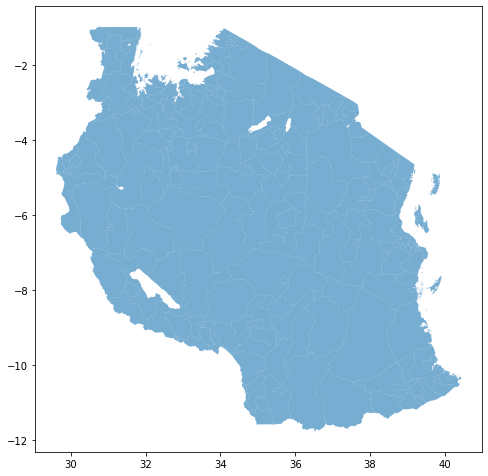

In [60]:
#plotting the data

fig,ax=plt.subplots(figsize=(8,10))
map.plot(ax=ax,alpha=0.6);
geo_df.plot(ax=ax,c=df1['status_group'],alpha=0.2)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.tight_layout()

In [56]:
df1['longitude'].value_counts()

0.000000     1777
37.543351       2
39.088875       2
37.318911       2
37.540901       2
             ... 
34.672962       1
39.433604       1
35.901580       1
37.532216       1
33.292860       1
Name: longitude, Length: 57516, dtype: int64

In [57]:
df1['latitude'].value_counts()

-2.000000e-08    1777
-6.983183e+00       2
-9.289349e+00       2
-2.487085e+00       2
-6.991294e+00       2
                 ... 
-7.698811e+00       1
-4.238133e+00       1
-3.145638e+00       1
-4.341816e+00       1
-2.598965e+00       1
Name: latitude, Length: 57517, dtype: int64

We can see that for reason currently unknown, that the central-western part of Tanzania is deficent in waterwells when compared to the rest of the country

# Analysis

In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59364 entries, 0 to 59399
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         59364 non-null  float64
 1   date_recorded      59364 non-null  object 
 2   funder             59364 non-null  object 
 3   gps_height         59364 non-null  int64  
 4   installer          59364 non-null  object 
 5   longitude          59364 non-null  float64
 6   latitude           59364 non-null  float64
 7   wpt_name           59364 non-null  object 
 8   num_private        59364 non-null  int64  
 9   basin              59364 non-null  object 
 10  subvillage         59364 non-null  object 
 11  region             59364 non-null  object 
 12  region_code        59364 non-null  int64  
 13  district_code      59364 non-null  int64  
 14  lga                59364 non-null  object 
 15  ward               59364 non-null  object 
 16  population         593

## Splitting the data into train and test sets

In [51]:
from sklearn.model_selection import train_test_split
X = df1.drop('status_group',axis=1)
y= df1[['status_group']]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [52]:
X_train.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,recorded_by,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type
30247,0.0,3/27/2011,Danida,0,DANIDA,33.328041,-8.997136,Patson Mwanyula,0,Lake Rukwa,...,GeoData Consultants Ltd,True,0,gravity,wug,pay when scheme fails,coloured,enough,river,communal standpipe
16066,0.0,10/11/2012,Halmashauri Ya Wilaya Sikonge,0,Halmashauri ya wilaya sikonge,32.740200,-5.766042,Kwa Nassibu Kayowora,0,Lake Tanganyika,...,GeoData Consultants Ltd,True,0,other,vwc,pay per bucket,soft,dry,spring,communal standpipe
6973,30.0,2/20/2013,Shawasa,933,SHAWASA,36.858826,-3.605154,Namilop,0,Pangani,...,GeoData Consultants Ltd,True,2009,submersible,vwc,pay per bucket,salty,enough,machine dbh,communal standpipe
57104,0.0,7/7/2011,He,0,HE,31.642198,-1.868894,Mlema,0,Lake Victoria,...,GeoData Consultants Ltd,True,0,other,vwc,never pay,soft,enough,machine dbh,other
48765,0.0,7/10/2011,Hesawa,0,DWE,31.123812,-1.725554,Kwarukala,0,Lake Victoria,...,GeoData Consultants Ltd,True,0,gravity,vwc,pay annually,soft,enough,spring,communal standpipe


In [64]:
df1['management'].nunique()

12

In [65]:
X_train_categorical = df1.select_dtypes(include=['object'])

In [70]:
X_train_categorical=X_train_categorical.astype('str')

In [73]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

X_train_categorical_ohe = ohe.fit_transform(X_train_categorical)
X_train_categorical_ohe.head()

AttributeError: head not found

In [72]:
X_train_categorical.head()

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,permit,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,status_group
0,3/14/2011,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,True,GeoData Consultants Ltd,False,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,functional
1,3/6/2013,Grumeti,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,Serengeti,Natta,MISSING,GeoData Consultants Ltd,True,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,2/25/2013,Lottery Club,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,Simanjiro,Ngorika,True,GeoData Consultants Ltd,True,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,functional
3,1/28/2013,Unicef,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,Nanyumbu,Nanyumbu,True,GeoData Consultants Ltd,True,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional
4,7/13/2011,Action In A,Artisan,Shuleni,Lake Victoria,Kyanyamisa,Kagera,Karagwe,Nyakasimbi,True,GeoData Consultants Ltd,True,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional
